<a href="https://colab.research.google.com/github/iliya1984/DevML/blob/main/computer_vision/autoencoders/convolutional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional autoencoders

### Importing the libraries

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
tf.__version__

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'2.15.0'

In [30]:
%run '/content/drive/MyDrive/Workspace/Computer Vision/autoencoders/mnist_dataset.ipynb'

### Loading the dataset

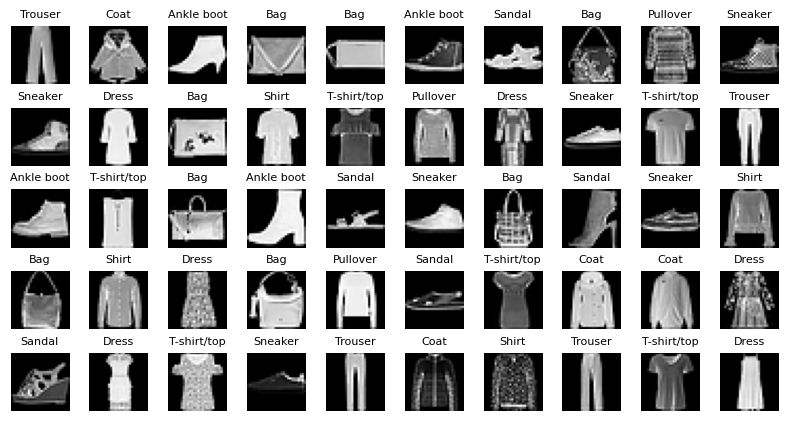

In [31]:
(X_train, y_train), (X_test, y_test), metadata = FashonMnistDataset.load(preview=True, preview_size=(10, 5))

### Pre-processing the images

In [32]:
X_train = X_train / 255
X_test = X_test / 255

In [33]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Building and training the convolutional autoencoder

In [34]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding = 'same', strides=(2,2)))

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder

autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [35]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [36]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 14s 5ms/step - loss: 0.3142 - accuracy: 0.5030
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2894 - accuracy: 0.5059
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2850 - accuracy: 0.5066
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2823 - accuracy: 0.5070
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2803 - accuracy: 0.5073
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2789 - accuracy: 0.5075
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2779 - accuracy: 0.5077
Epoch 8/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2771 - accuracy: 0.5078
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2764 - accuracy: 0.5079
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 

### Encoding and decoding the test images

In [38]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584   

In [39]:
coded_test_images = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [40]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28, 1)

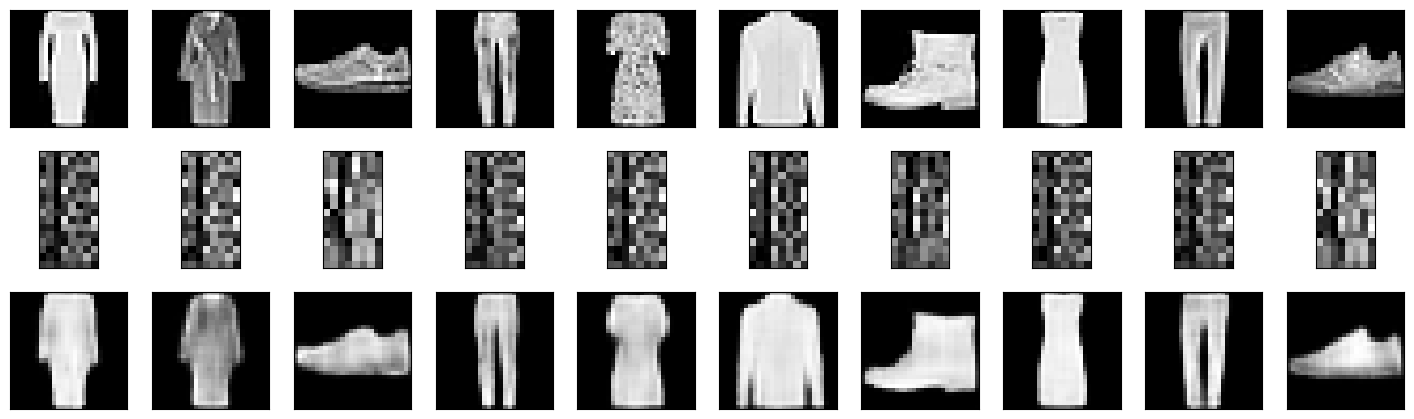

In [41]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original images
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10, i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10, i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())